In [1]:
import pandas as pd

In [2]:
# read data
price_df = pd.read_csv("./data/forecasting.csv")
price_df.columns = price_df.columns.str.lower()
price_df["date"] = pd.to_datetime(price_df["date"])
len(price_df)

43544

In [3]:
# engineer some features
price_df["is_apartment"] = (
    price_df["categories"].map(lambda x: "APARTMENT" in x).map(int)
)
price_df["categories"] = price_df["categories"].str.replace("APARTMENT, ", "")

price_df["is_duplex"] = price_df["categories"].map(lambda x: "DUPLEX" in x).map(int)
price_df["categories"] = price_df["categories"].str.replace("DUPLEX, ", "")


price_df["is_house"] = price_df["categories"].map(lambda x: "HOUSE" in x).map(int)
price_df["categories"] = price_df["categories"].str.replace("HOUSE, ", "")

# categorize with ChatGPT
residential = [
    "DUPLEX",
    "FURNISHED_FLAT",
    "APARTMENT",
    "FLAT",
    "ROOF_FLAT",
    "ATTIC_FLAT",
    "LOFT",
    "SINGLE_ROOM",
    "STUDIO",
    "HOUSE",
    "ROW_HOUSE",
    "DUPLEX, MAISONETTE",
    "HOUSE, SINGLE_HOUSE",
    "ROW_HOUSE",
    "ATTIC",
    "BIFAMILIAR_HOUSE",
    "HOUSE, BIFAMILIAR_HOUSE",
    "TERRACE_FLAT",
    "BACHELOR_FLAT",
    "HOUSE, VILLA",
    "HOUSE, MULTIPLE_DWELLING",
    "VILLA",
]

commercial = [
    "OFFICE",
    "COMMERCIAL",
    "RETAIL, PRACTICE",
    "SHOP, ATELIER",
    "RETAIL, COMMERCIAL",
    "RESTAURANT",
    "WORKSHOP",
    "RETAIL, SHOP",
    "SHOP",
    "RESIDENTIAL_COMMERCIAL_BUILDING",
    "HOBBY_ROOM",
    "INDUSTRIAL_OBJECT",
    "STORAGE_ROOM",
    "ATELIER",
    "CAFE_BAR, RESTAURANT",
    "RETAIL, HAIRDRESSER",
    "RETAIL_SPACE, ATELIER",
    "ADVERTISING_AREA",
    "FACTORY",
    "RETAIL, STORAGE_ROOM",
    "UNDERGROUND_SLOT",
    "CAFE_BAR, BAR",
    "PRACTICE",
    "COFFEEHOUSE",
]

price_df["is_residential"] = price_df["categories"].isin(residential).map(int).fillna(0)
price_df["is_commercial"] = price_df["categories"].isin(commercial).map(int).fillna(0)

In [4]:
# remove NAs in target
print(price_df.price.isna().value_counts())
print(price_df.space.isna().value_counts())
price_df = price_df.dropna(subset=["price"])  # "space"
len(price_df)

False    37397
True      6147
Name: price, dtype: int64
False    34545
True      8999
Name: space, dtype: int64


37397

In [5]:
price_df.drop(columns=["date", "categories"]).corr().style.background_gradient(
    cmap="coolwarm"
)

,price,space,is_apartment,is_duplex,is_house,is_residential,is_commercial
price,1.000000,0.159076,-0.042458,0.009543,0.018420,-0.044072,0.046681
space,0.159076,1.000000,-0.187060,0.247235,0.270212,-0.263992,0.154457
is_apartment,-0.042458,-0.187060,1.000000,-0.144783,-0.194864,0.711457,-0.660235
is_duplex,0.009543,0.247235,-0.144783,1.000000,-0.021266,0.027209,-0.072052
is_house,0.018420,0.270212,-0.194864,-0.021266,1.000000,-0.099882,-0.041227
is_residential,-0.044072,-0.263992,0.711457,0.027209,-0.099882,1.000000,-0.900368
is_commercial,0.046681,0.154457,-0.660235,-0.072052,-0.041227,-0.900368,1.000000


In [6]:
residential_df = price_df.query("is_residential == 1").drop(
    columns=["is_commercial", "is_residential"]
)
len(residential_df)

31582

In [7]:
residential_df.sort_values("is_apartment")

,date,price,space,categories,is_apartment,is_duplex,is_house
0,2018-04-07,2650.0,190.0,DUPLEX,0,1,0
36571,2018-10-25,3700.0,130.0,ROW_HOUSE,0,0,1
28897,2019-06-12,1050.0,35.0,FURNISHED_FLAT,0,0,0
36576,2018-04-03,1400.0,85.0,ROOF_FLAT,0,0,0
36585,2018-05-15,799.0,25.0,FURNISHED_FLAT,0,0,0
...,...,...,...,...,...,...,...
15013,2021-01-22,1700.0,91.0,ROOF_FLAT,1,0,0
15011,2021-08-11,1900.0,70.0,FLAT,1,0,0
15010,2021-02-05,1400.0,75.0,FLAT,1,0,0
15024,2021-06-16,700.0,34.0,STUDIO,1,0,0


In [8]:
residential_df.join(pd.get_dummies(residential_df["categories"]).applymap(int)).drop(
    columns=["date", "categories"]
).corr().style.background_gradient(cmap="coolwarm")

,price,space,is_apartment,is_duplex,is_house,APARTMENT,ATTIC,ATTIC_FLAT,BACHELOR_FLAT,BIFAMILIAR_HOUSE,DUPLEX,FLAT,FURNISHED_FLAT,LOFT,ROOF_FLAT,ROW_HOUSE,SINGLE_ROOM,STUDIO,TERRACE_FLAT,VILLA
price,1.000000,0.130818,-0.040999,0.032242,0.035898,-0.027656,-0.012218,0.016550,-0.000231,0.017905,0.032242,-0.018159,0.052532,0.005107,0.006134,0.028452,-0.024823,-0.013890,0.001884,0.021388
space,0.130818,1.000000,-0.129729,0.287626,0.202538,-0.046219,-0.079560,0.077122,-0.004281,0.131518,0.287626,-0.071248,0.009600,0.048819,0.078471,0.155293,-0.223986,-0.127795,0.012588,0.094406
is_apartment,-0.040999,-0.129729,1.000000,-0.317157,-0.241076,0.304123,-0.066672,-0.138909,-0.012999,-0.108945,-0.317157,0.295703,-0.372489,-0.088829,-0.241861,-0.209258,-0.176435,-0.134332,-0.028819,-0.067531
is_duplex,0.032242,0.287626,-0.317157,1.000000,-0.017295,-0.157018,-0.009264,-0.021853,-0.002166,-0.007816,1.000000,-0.152670,-0.059082,-0.013905,-0.036903,-0.015012,-0.025787,-0.019005,-0.005630,-0.004845
is_house,0.035898,0.202538,-0.241076,-0.017295,1.000000,-0.073317,-0.004325,-0.010204,-0.001011,0.451911,-0.017295,-0.071287,-0.027587,-0.006493,-0.017231,0.868015,-0.012041,-0.008874,-0.002629,0.138929
APARTMENT,-0.027656,-0.046219,0.304123,-0.157018,-0.073317,1.000000,-0.039270,-0.092638,-0.009182,-0.033133,-0.157018,-0.647201,-0.250459,-0.058945,-0.156439,-0.063640,-0.109317,-0.080566,-0.023865,-0.020538
ATTIC,-0.012218,-0.079560,-0.066672,-0.009264,-0.004325,-0.039270,1.000000,-0.005465,-0.000542,-0.001955,-0.009264,-0.038183,-0.014776,-0.003478,-0.009229,-0.003755,-0.006449,-0.004753,-0.001408,-0.001212
ATTIC_FLAT,0.016550,0.077122,-0.138909,-0.021853,-0.010204,-0.092638,-0.005465,1.000000,-0.001278,-0.004611,-0.021853,-0.090074,-0.034857,-0.008204,-0.021772,-0.008857,-0.015214,-0.011213,-0.003321,-0.002858
BACHELOR_FLAT,-0.000231,-0.004281,-0.012999,-0.002166,-0.001011,-0.009182,-0.000542,-0.001278,1.000000,-0.000457,-0.002166,-0.008928,-0.003455,-0.000813,-0.002158,-0.000878,-0.001508,-0.001111,-0.000329,-0.000283
BIFAMILIAR_HOUSE,0.017905,0.131518,-0.108945,-0.007816,0.451911,-0.033133,-0.001955,-0.004611,-0.000457,1.000000,-0.007816,-0.032215,-0.012467,-0.002934,-0.007787,-0.003168,-0.005441,-0.004010,-0.001188,-0.001022


In [9]:
residential_df

,date,price,space,categories,is_apartment,is_duplex,is_house
0,2018-04-07,2650.0,190.0,DUPLEX,0,1,0
1,2018-03-15,2850.0,190.0,DUPLEX,0,1,0
2,2020-06-05,4600.0,170.0,FURNISHED_FLAT,1,0,0
6,2018-03-13,1370.0,NaN,APARTMENT,1,0,0
8,2018-11-06,1110.0,NaN,APARTMENT,1,0,0
...,...,...,...,...,...,...,...
43537,2021-02-04,1320.0,75.0,FLAT,1,0,0
43538,2020-08-10,1950.0,120.0,LOFT,1,0,0
43539,2020-08-14,1990.0,70.0,DUPLEX,1,1,0
43542,2020-08-18,1540.0,75.0,FLAT,1,0,0


<Axes: >

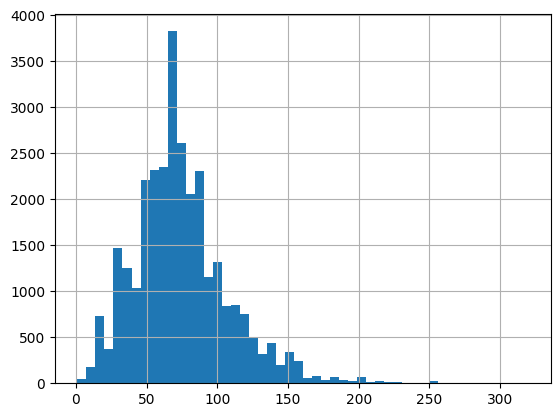

In [10]:
residential_df["space"].hist(bins=50)

In [12]:
d = {range(0, 50): "sm", range(50, 100): "md", range(100, 2000): "bg"}

residential_df["size"] = residential_df["space"].apply(
    lambda x: next((v for k, v in d.items() if x in k), "sm")
)

In [13]:
residential_df

,date,price,space,categories,is_apartment,is_duplex,is_house,size
0,2018-04-07,2650.0,190.0,DUPLEX,0,1,0,bg
1,2018-03-15,2850.0,190.0,DUPLEX,0,1,0,bg
2,2020-06-05,4600.0,170.0,FURNISHED_FLAT,1,0,0,bg
6,2018-03-13,1370.0,NaN,APARTMENT,1,0,0,sm
8,2018-11-06,1110.0,NaN,APARTMENT,1,0,0,sm
...,...,...,...,...,...,...,...,...
43537,2021-02-04,1320.0,75.0,FLAT,1,0,0,md
43538,2020-08-10,1950.0,120.0,LOFT,1,0,0,bg
43539,2020-08-14,1990.0,70.0,DUPLEX,1,1,0,md
43542,2020-08-18,1540.0,75.0,FLAT,1,0,0,md


## Modelling

In [20]:
from pycaret.regression import RegressionExperiment

s = RegressionExperiment()
s.setup(
    residential_df.drop(columns=["categories", "date"]),
    target="price",
    session_id=123,
    log_experiment=True,
    experiment_name="price_forecast",
)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(31582, 6)"
4,Transformed data shape,"(31582, 8)"
5,Transformed train set shape,"(22107, 8)"
6,Transformed test set shape,"(9475, 8)"
7,Numeric features,4
8,Categorical features,1
9,Rows with missing values,4.5%


run `mlflow ui` in the terminal

In [21]:
best = s.compare_models(
    include=[
        "lr",
        "ridge",
        "lasso",
        "huber",
        "rf",
        "catboost",
        "lightgbm",
        "knn",
        "xgboost",
    ]
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,364.2615,34468493.4750,2353.3478,0.5429,0.2894,0.2509,0.0160
lasso,Lasso Regression,375.6089,34480184.3446,2365.5492,0.5258,0.2957,0.2516,0.0130
lr,Linear Regression,375.6362,34480063.2512,2365.5577,0.5257,0.2956,0.2519,0.0140
ridge,Ridge Regression,375.8245,34480178.4898,2365.6579,0.5256,0.2957,0.2519,0.0150
huber,Huber Regressor,353.1246,34487327.6785,2368.5400,0.5216,0.2869,0.2206,0.0500
lightgbm,Light Gradient Boosting Machine,379.1165,34639483.6071,2490.6191,0.3204,0.3087,0.2752,0.4220
catboost,CatBoost Regressor,376.1148,34641588.8767,2492.5665,0.3169,0.3069,0.2642,0.3860
xgboost,Extreme Gradient Boosting,375.5682,34645959.1250,2495.4334,0.3115,0.3071,0.2629,0.0250
rf,Random Forest Regressor,377.1528,34662312.3222,2507.6897,0.2869,0.3087,0.2644,0.1050


In [22]:
print(best)

KNeighborsRegressor(n_jobs=-1)


In [23]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
s.plot_model(best, plot="feature")

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

In [28]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,323.7132,296044.8125,544.1000,0.6090,0.2765,0.2063


,space,is_apartment,is_duplex,is_house,size,price,prediction_label
34346,60.0,1,0,0,md,1220.0,1174.800049
30106,105.0,1,0,0,bg,2790.0,1853.000000
28664,128.0,0,0,0,bg,2880.0,2536.000000
39871,158.0,0,1,0,bg,2650.0,3168.000000
35500,81.0,1,0,0,md,1450.0,1673.599976
...,...,...,...,...,...,...,...
1404,86.0,1,0,0,md,1950.0,1628.000000
40436,31.0,1,0,0,sm,700.0,883.000000
40129,35.0,1,0,0,sm,1000.0,724.000000
26537,NaN,1,0,0,sm,1220.0,1528.000000


In [ ]:
from pycaret.time_series import TSForecastingExperiment

t = TSForecastingExperiment()
t.setup(price_df.set_index("date")["price"], fh=3, fold=5, session_id=123)
t.compare_models()